## Evaluating classifiers

---

* **Learning objective**: 
    * Understand the main tools available to judge your model
    * **sklearn.metrics** is your friend!
* **Content to be covered**:
    * True & False /  Positives & Negatives: 
    * Accuracy
    * Precision vs recall
    * Confusion matrix
    * ROC and AUC (**if there's time**)
* **First the theory, then the applied coding**

---

In [2]:
import pandas as pd
df = pd.read_csv('Data/train.csv')

### Accuracy:
* The percentage of correct guesses
* A nice simple way of assessing the model
* Fails with class imbalance

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

#df = df.dropna(subset=['Age'])

X = df[['Fare']] #keep as pandas array
y = df['Survived'] #keep as vector

In [36]:
m = LogisticRegression(solver = 'lbfgs')
m.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
ypred = m.predict(X)

In [38]:
c = confusion_matrix(y, ypred)

| Scenario | Predicted: NO | Predicted: YES |
| --- | ----- | --- |
| **Actual: NO** | TN | FP |
| **Actual: YES** | FN | TP |

In [39]:
cm = pd.DataFrame(c, index = ['Actual-NO','Actual-YES'], columns = ['Pred-NO','Pred-Yes'])
cm

,Pred-NO,Pred-Yes
Actual-NO,392,32
Actual-YES,204,86


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1, 'Confusion Matrics for Tatanic')

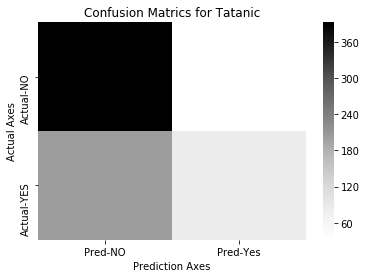

In [41]:
sns.heatmap(cm, cmap='Greys')
plt.xlabel('Prediction Axes')
plt.ylabel('Actual Axes')
plt.title('Confusion Matrics for Tatanic')

---

---

### Precision vs recall
* A trade off between exactness and totalness
* Precision = **exactness** 
* Precision = tp / (tp + fp)
    * High Precision = more relevant than irrelevant results returned (at the expense of missing some relevant ones)
    * Also called False Positive Rate
    * High when false positives are low
* Recall = **totalness**. 
* Recall = tp / (tp + fn)
    * High Recall = most of the relevant results returned, (at the expense of including bad results)
    * Also called True Positive Rate
    * High when false negatives are low 
* Remember the two scenarios! Which one suits which measure?

In [42]:
from sklearn.metrics import precision_score, recall_score
recall_score(y,ypred), precision_score(y, ypred)

(0.296551724137931, 0.7288135593220338)

---

### ROC and AUC
* A bit like the confusion matrix, but for multiple thresholds
* Receiver Operating Characteristics Curve 
    * ROC shows the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. 
    * Put another way, plot recall on the x-axis, and precision on the y-axis
* Area Under Curve
    * the AUC function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. It returns the AUC score between 0.0 and 1.0
* We basically want as much under the curve as possible! So the higher the AUC the better!

In [43]:
from sklearn.metrics import roc_curve, auc

Text(0, 0.5, 'False-Neg rate or Recall')

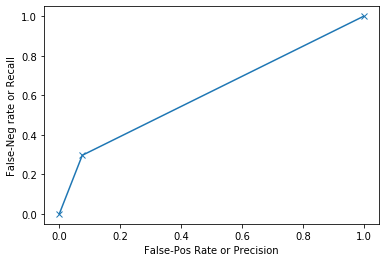

In [45]:
precision, recall, threshold = roc_curve(y,ypred)

plt.plot(precision, recall, marker = 'x')
plt.xlabel('False-Pos Rate or Precision')
plt.ylabel('False-Neg rate or Recall')

In [49]:
auc(precision, recall) #area under curve

0.6105400130123617

---